In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv(r"C:\Users\Anushika Mishra\Downloads\owid-co2-data.csv")

# Basic overview
print(df.shape)
print(df.columns.tolist())
print(df[['country', 'year']].head())
df.describe()


(50191, 79)
['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2', 'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct', 'co2_including_luc', 'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct', 'co2_including_luc_per_capita', 'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy', 'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2', 'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita', 'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2', 'cumulative_co2_including_luc', 'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2', 'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita', 'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2', 'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita', 'land_use_change_co2', 'land_use_change_co2_per_capita', 'methane', 'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_p

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
count,50191.000000,4.101900e+04,1.525100e+04,28863.000000,25358.000000,29137.000000,26981.000000,26002.000000,23585.000000,23285.000000,...,2108.000000,41001.000000,38060.000000,41001.000000,41001.000000,38060.000000,37410.000000,37236.000000,4535.000000,4535.000000
mean,1919.883067,5.686141e+07,3.300495e+11,7.767746,0.059036,415.698178,6.208882,43.104462,535.581202,7.214604,...,7.512655,2.269285,0.003026,0.007670,0.011023,0.000509,488.542225,316.133529,-7.232399,20.524440
std,65.627296,3.199905e+08,3.086383e+12,62.595292,0.120328,1945.843973,62.322553,1729.939596,2202.219657,99.347980,...,17.671054,9.315325,0.016519,0.043694,0.061901,0.003043,2392.579910,1839.602293,250.640012,52.744956
min,1750.000000,2.150000e+02,4.998000e+07,0.000000,0.000000,0.000000,-1977.750000,-100.000000,-99.693000,-2325.500000,...,0.000000,-0.810000,-0.001000,0.000000,-0.001000,0.000000,-14.961000,0.000000,-2195.952000,-98.849000
25%,1875.000000,3.273130e+05,7.874038e+09,0.000000,0.000000,0.374000,-0.005000,-1.102500,6.418000,-0.908000,...,0.204750,0.004000,0.000000,0.000000,0.000000,0.000000,1.835000,0.235000,-3.179500,-6.168000
50%,1924.000000,2.289522e+06,2.743861e+10,0.000000,0.001000,4.990000,0.044000,3.803500,27.691000,0.078000,...,0.838000,0.078000,0.000000,0.000000,0.000000,0.000000,15.007500,2.371000,1.518000,8.701000
75%,1974.000000,9.862459e+06,1.212627e+11,0.486000,0.075750,53.273000,1.002000,10.890750,123.959000,2.620000,...,3.211000,0.359000,0.001000,0.001000,0.001000,0.000000,78.242750,29.337500,9.153500,32.666000
max,2023.000000,8.091735e+09,1.301126e+14,1696.308000,2.484000,37791.570000,1865.208000,180870.000000,41416.480000,2340.184000,...,100.000000,100.000000,0.422000,1.161000,1.668000,0.085000,53816.852000,44114.785000,1798.999000,568.635000


In [12]:
# Keep only data after 1990 and with non-null CO₂ and population
df_clean = df[(df['year'] >= 1990) & df['co2'].notna() & df['population'].notna()]

# Fill missing GDP values with country-wise forward fill
df_clean['gdp'] = df_clean.groupby('country')['gdp'].ffill()

C:\Users\Anushika Mishra\AppData\Local\Temp\ipykernel_22184\3729224552.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['gdp'] = df_clean.groupby('country')['gdp'].ffill()


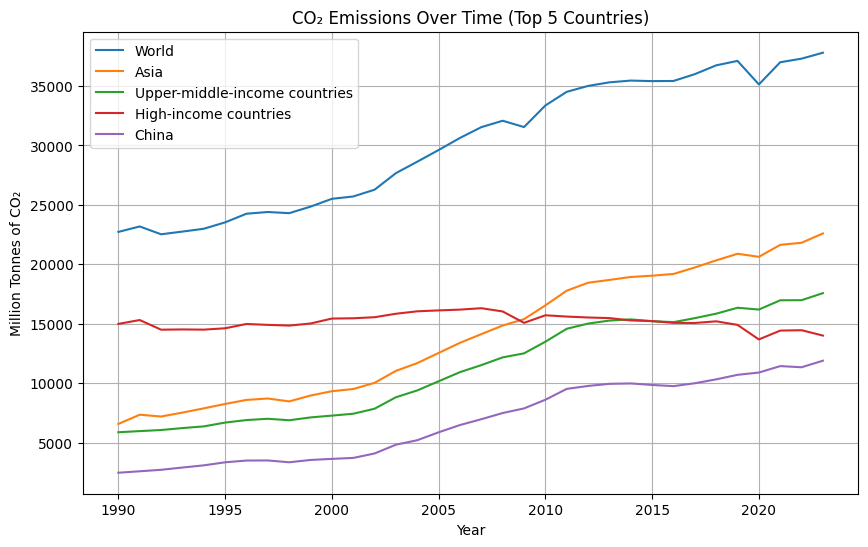

In [13]:
top_emitters = df_clean[df_clean['year'] == 2020].nlargest(5, 'co2')['country']

plt.figure(figsize=(10,6))
for country in top_emitters:
    subset = df_clean[df_clean['country'] == country]
    plt.plot(subset['year'], subset['co2'], label=country)

plt.title("CO₂ Emissions Over Time (Top 5 Countries)")
plt.xlabel("Year")
plt.ylabel("Million Tonnes of CO₂")
plt.legend()
plt.grid(True)
plt.show()


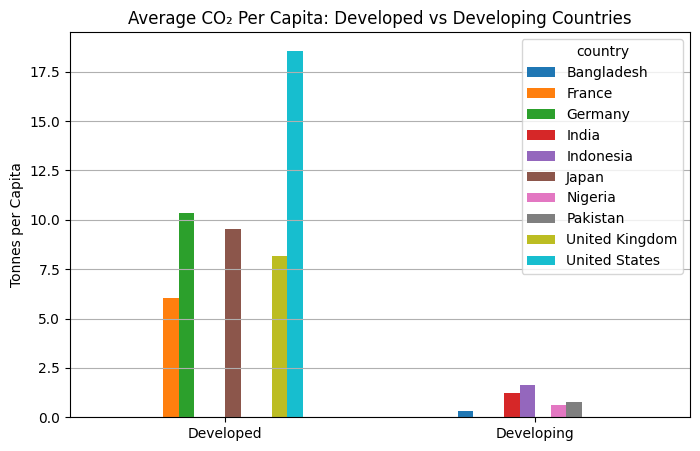

In [14]:
# Hypothesis 1:Developed countries have higher per capita CO₂ emissions than developing countries.
developed = ['United States', 'Germany', 'Japan', 'United Kingdom', 'France']
developing = ['India', 'Indonesia', 'Nigeria', 'Bangladesh', 'Pakistan']

def group_mean(df, countries):
    return df_clean[df_clean['country'].isin(countries)].groupby('country')['co2_per_capita'].mean()

dev_avg = group_mean(df_clean, developed)
devp_avg = group_mean(df_clean, developing)

# Combine into a DataFrame for plotting
compare_df = pd.DataFrame({
    'Developed': dev_avg,
    'Developing': devp_avg
}).T

compare_df.plot(kind='bar', figsize=(8,5))
plt.title("Average CO₂ Per Capita: Developed vs Developing Countries")
plt.ylabel("Tonnes per Capita")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [15]:
#Hypothesis Testing
 #Perform T-Test
from scipy.stats import ttest_ind

dev_vals = df_clean[df_clean['country'].isin(developed)]['co2_per_capita'].dropna()
devp_vals = df_clean[df_clean['country'].isin(developing)]['co2_per_capita'].dropna()

t_stat, p_val = ttest_ind(dev_vals, devp_vals, equal_var=False)
print(f"T-test: t = {t_stat:.3f}, p = {p_val:.3e}")


T-test: t = 27.227, p = 1.165e-64


                gdp_per_capita  co2_per_capita
gdp_per_capita        1.000000        0.569809
co2_per_capita        0.569809        1.000000


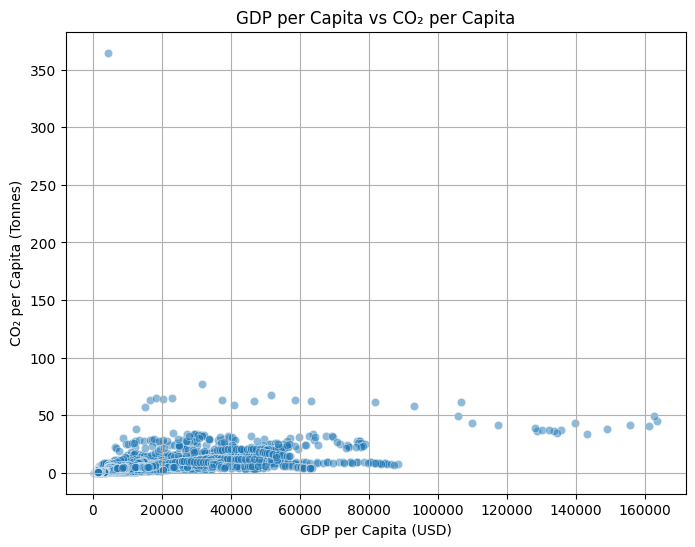

In [16]:
#Hypothesis 2:
#Higher GDP per capita correlates with higher CO₂ emissions per capita.
df_corr = df_clean[['gdp', 'population', 'co2', 'co2_per_capita']].dropna()
df_corr['gdp_per_capita'] = df_corr['gdp'] / df_corr['population']

# Correlation Matrix
correlation = df_corr[['gdp_per_capita', 'co2_per_capita']].corr()
print(correlation)

# Scatter Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_corr, x='gdp_per_capita', y='co2_per_capita', alpha=0.5)
plt.title("GDP per Capita vs CO₂ per Capita")
plt.xlabel("GDP per Capita (USD)")
plt.ylabel("CO₂ per Capita (Tonnes)")
plt.grid(True)
plt.show()


In [17]:
summary_table = df_clean[df_clean['year'] == 2020].groupby('country')[
    ['co2', 'co2_per_capita', 'gdp', 'population']
].mean().sort_values(by='co2', ascending=False).head(10)

summary_table.style.background_gradient(cmap="Reds")


,co2,co2_per_capita,gdp,population
country,,,,
World,35126.527000,4.454000,118590019731456.000000,7887001284.000000
Asia,20634.852000,4.403000,nan,4686811205.000000
Upper-middle-income countries,16202.027000,5.707000,nan,2817793595.000000
High-income countries,13688.639000,9.817000,nan,1245004614.000000
China,10905.693000,7.647000,24151844716544.000000,1426106083.000000
Asia (excl. China and India),7307.606000,3.933000,nan,1788807936.000000
North America,5826.628000,9.809000,nan,598250660.000000
Europe,5026.315000,6.698000,nan,750826495.000000
United States,4714.628000,13.890000,18027359764480.000000,339436157.000000


In [18]:
#hypothesis 2 test
#Statistical Test: Pearson Correlation
df_corr = df_clean[['gdp', 'population', 'co2_per_capita']].dropna()
df_corr['gdp_per_capita'] = df_corr['gdp'] / df_corr['population']

# Pearson correlation
corr2 = df_corr[['gdp_per_capita', 'co2_per_capita']].corr().iloc[0,1]
print(f"Hypothesis 2 - Correlation between GDP per capita and CO₂ per capita: {corr2:.3f}")


Hypothesis 2 - Correlation between GDP per capita and CO₂ per capita: 0.570


 Global correlation between coal CO₂ and total CO₂ per capita: 0.402


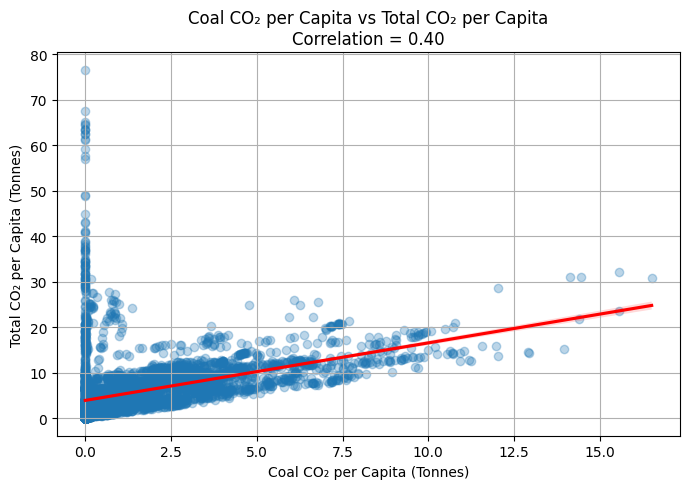

In [19]:
#Hypothesis 3:
#Countries with higher coal consumption per capita also emit more CO₂ per capita.
# Select only relevant columns and drop missing values
df_coal = df_clean[['country', 'year', 'coal_co2_per_capita', 'co2_per_capita']].dropna()

# Calculate correlation globally
global_corr = df_coal['coal_co2_per_capita'].corr(df_coal['co2_per_capita'])
print(f" Global correlation between coal CO₂ and total CO₂ per capita: {global_corr:.3f}")

# Plotting global trend
plt.figure(figsize=(7, 5))
sns.regplot(
    data=df_coal, 
    x='coal_co2_per_capita', 
    y='co2_per_capita', 
    scatter_kws={'alpha':0.3}, 
    line_kws={'color':'red'}
)
plt.title(f"Coal CO₂ per Capita vs Total CO₂ per Capita\nCorrelation = {global_corr:.2f}")
plt.xlabel("Coal CO₂ per Capita (Tonnes)")
plt.ylabel("Total CO₂ per Capita (Tonnes)")
plt.grid(True)
plt.tight_layout()
plt.show()
